In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import math
from tkinter import*


In [ ]:
def entrar():
    # Toplevel() porque já existe uma janela principal (janelaprincipal = Tk())
    janela = Toplevel()
    janela.title("Buscar")
    janela.geometry('400x600')

    Lab1 = Label(janela, text='Dia')
    Lab1.pack()
    textao = Entry(janela, textvariable=dia, borderwidth=5, relief='ridge')
    textao.pack()

    Lab2 = Label(janela, text='Mês')
    Lab2.pack()
    textao2 = Entry(janela, textvariable=mes, borderwidth=5, relief='ridge')
    textao2.pack()

    Lab3 = Label(janela, text='Ano')
    Lab3.pack()
    textao3 = Entry(janela, textvariable=ano, borderwidth=5, relief='ridge')
    textao3.pack()

    Lab4 = Label(janela, text='Dia')
    Lab4.pack()
    textao4 = Entry(janela, textvariable=dia2, borderwidth=5, relief='ridge')
    textao4.pack()

    Lab4 = Label(janela, text='Mês')
    Lab4.pack()
    textao4 = Entry(janela, textvariable=mes2, borderwidth=5, relief='ridge')
    textao4.pack()
    
    Lab3 = Label(janela, text="BR")
    Lab3.pack()
    textao3 = Entry(janela, textvariable=br, borderwidth=5, relief='ridge')
    textao3.pack()

    
  
    # Botão que irá chamar a nova tela ou tkinter messagebox.
    btn_salvar = Button(janela, text='Buscar', command=lambda: diaD(dia))
    btn_salvar = Button(janela, text='Buscar', command=lambda: mesD(mes))
    btn_salvar = Button(janela, text='Buscar', command=lambda: anoD(ano))
    btn_salvar = Button(janela, text='Buscar', command=lambda: dia2D(dia2D))
    btn_salvar = Button(janela, text='Buscar', command=lambda: mes2D(mes2D))
    btn_salvar = Button(janela, text='Buscar', command=lambda: brD(br))
    btn_salvar = Button(janela,text='Buscar', command=clicked)
    

    btn_salvar.pack()
def clicked():
    messagebox.showinfo('Message title', 'Feito!')
def diaD(dia):
    dia =(dia.get())
    return (dia)
def mesD(mes):
    mes =(mes.get())
    return (mes)
def anoD(ano):
    ano = (ano.get())
    return (ano)

def dia2D(dia2):
    dia2 = (dia2.get())
    return (dia2)

def mes2D(mes2):
    mes2 = (mes2.get())
    return (mes2)

def brD(br):
    br = (br.get())
    return (br)

def sair():
    janelaprincipal.quit()


# JanPrincipal
janelaprincipal = Tk()
janelaprincipal.title('Menu Principal')
janelaprincipal.geometry('1010x400')
janelaprincipal['bg'] = '#C1FFC1'

mensagem1 = Label(janelaprincipal,
                  text='Seja bem-vindo!',
                  font=' -size 12', bg='green', fg='white')
mensagem1.pack(side=TOP)

botaocadastro = Button(janelaprincipal, text='Buscar', font='-weight bold -size 16',
                       bg='green', fg='white', width=20, activebackground='#B4EEB4', command=entrar)
botaocadastro.place(x=355, y=40)

botaoPlotar = Button(janelaprincipal, text='Plotar', font='-weight bold -size 16',
                       bg='green', fg='white', width=20, activebackground='#B4EEB4', command=entrar)
botaoPlotar.place(x=355, y=80)

botaosair = Button(janelaprincipal, text='Sair', font='-weight bold -size 16',
                   bg='green', fg='white', width=20, activebackground='#B4EEB4', command=sair)
botaosair.place(x=355, y=120)

# Variáveis
dia = StringVar()
mes= StringVar()
ano = StringVar()
dia2 = StringVar()
mes2 = StringVar()
br = StringVar()


mainloop()

dia = diaD(dia)
mes = mesD(mes)
ano = anoD(ano)
dia2 = dia2D(dia2)
mes2 = mes2D(mes2)
br2d = brD(br)
print(dia)
print(mes)
print(ano)
print(dia2)
print(mes2)
print(br2d)
def tranforma_data(data):
    data_return = datetime.strptime(data, '%Y-%m-%d')
    return data_return

def indica_ano(ano1, df1, df2, df3):
    if ano1 == '2017':
        df_usado = df1
    elif ano1 == '2018':
        df_usado= df2
    else:
        df_usado = df3
    return df_usado

def slice_por_data(dataframe, inicial, final):
    separado = dataframe.loc[(dataframe['data_inversa'] >= inicial) & (dataframe['data_inversa'] <= final)]
    separado = separado.reset_index(drop = True)
    return separado


def slice_por_br(dataframe, br):
    sliced = dataframe.loc[(dataframe['br'] == br)]
    sliced = sliced.reset_index(drop=True)
    # sliced['km'] = sliced['km'].astype(float, copy = False)
    km = pd.Series(sliced['km'])
    for i in range(len(km)):
        km[i] = float(km[i].replace(',', '.'))
    sliced['km'] = km
    return sliced

def define_series(df):
    menor = df['km'].min()
    maior = df['km'].max()
    amplitude = maior - menor
    num_series = 1 + (3.3 * (math.log(len(df['km']), 10)))
    num_series = int(num_series)
    amp_series = round(amplitude / num_series, 1)
    limites = []
    temp = menor
    for i in range(num_series):
        limites.append(temp)
        temp += amp_series
    limites.append(temp)
    return limites

def lista_causas(df):
    causas = []
    for i in range(5):
        causas.append(df['causa_acidente'].value_counts().index[i])
    return causas


def define_contagem(df, causa):
    limites = define_series(df)
    contagem = []

    for i in range(len(limites) - 1):
        contagem.append(0)
    for i in range(len(df)):
        if causa == df['causa_acidente'][i]:
            for j in range(1, len(limites)):
                if j == len(limites) - 1:
                    if (df['km'][i] >= limites[j - 1]) & (df['km'][i] <= limites[j]):
                        contagem[j - 1] += 1
                else:
                    if (df['km'][i] >= limites[j - 1]) & (df['km'][i] < limites[j]):
                        contagem[j - 1] += 1

    return contagem

def define_trechos(df):
    limites = define_series(df)
    x = []
    for i in range(1,len(limites)):
        if i == len(limites) -1:
            x.append(('{:.1f}|--|{:.1f}').format(limites[i-1], limites[i]))
        else:
            x.append(('{:.1f}|--{:.1f}').format(limites[i-1], limites[i]))
    return x

def plot_grafico(df, x, y, causa, br):
    height = y
    bars = x
    index = np.arange(len(bars))
    plt.barh(height, bars)
    plt.title(('Nº de ocorrencias causadas por\n {}na BR {}').format(causa.strip(), br))
    plt.figure(figsize = (100,50))
    plt.show()



#MAIN

dia1 = input()
mes1 = input()
ano1 = input()

data_inicial = "{}-{}-{}".format(ano1,mes1,dia1)
data_inicial = tranforma_data(data_inicial)


dia2 = input()
mes2 = input()
ano2 = ano1


data_final = "{}-{}-{}".format(ano2,mes2,dia2)
data_final = tranforma_data(data_final)

df_processado = indica_ano(ano1, dados_2017, dados_2018, dados_2019)

df_processado['data_inversa'] = pd.to_datetime(df_processado['data_inversa'])

separado_data = slice_por_data(df_processado, data_inicial, data_final)

br = float(input())

separado_br = slice_por_br(separado_data,br)

#TESTES

menor = separado_br['km'].min()
maior = separado_br['km'].max()
amplitude = maior - menor
num_series = 1 + (3.3 * (math.log(len(separado_br['km']), 10)))
num_series = int(num_series)
amp_series = round(amplitude / num_series, 1)
limites = []
temp = menor
print(menor, ' ', maior, ' ', amplitude, ' ', num_series, ' ', amp_series)
for i in range(num_series):
    limites.append(temp)
    print(temp)
    temp += amp_series
limites.append(temp)
print(limites[-1])

causas = lista_causas(separado_br)
causas

a = define_contagem(separado_br, causas[2])
b = define_series(separado_br)
print(a)
print(b)
print(separado_br['causa_acidente'][7])
print(separado_br['km'][7])
plot_grafico(separado_br, a, b, causas[2], br)

02
02
2019
22
03
101
0.0   950.0   950.0   11   86.4
0.0
86.4
172.8
259.20000000000005
345.6
432.0
518.4
604.8
691.1999999999999
777.5999999999999
863.9999999999999
950.3999999999999
[38, 43, 30, 26, 5, 1, 1, 0, 1, 1, 0]
[0.0, 86.4, 172.8, 259.20000000000005, 345.6, 432.0, 518.4, 604.8, 691.1999999999999, 777.5999999999999, 863.9999999999999, 950.3999999999999]
Defeito Mecânico no Veículo
91.9


ValueError: shape mismatch: objects cannot be broadcast to a single shape

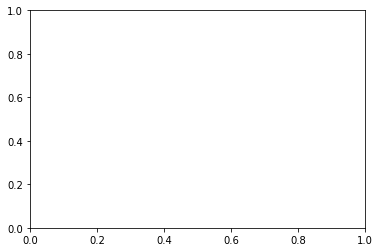

In [19]:
def tranforma_data(data):
    data_return = datetime.strptime(data, '%Y-%m-%d')
    return data_return

def indica_ano(ano1, df1, df2, df3):
    if ano1 == '2017':
        df_usado = df1
    elif ano1 == '2018':
        df_usado= df2
    else:
        df_usado = df3
    return df_usado

def slice_por_data(dataframe, inicial, final):
    separado = dataframe.loc[(dataframe['data_inversa'] >= inicial) & (dataframe['data_inversa'] <= final)]
    separado = separado.reset_index(drop = True)
    return separado


def slice_por_br(dataframe, br):
    sliced = dataframe.loc[(dataframe['br'] == br)]
    sliced = sliced.reset_index(drop=True)
    # sliced['km'] = sliced['km'].astype(float, copy = False)
    km = pd.Series(sliced['km'])
    for i in range(len(km)):
        km[i] = float(km[i].replace(',', '.'))
    sliced['km'] = km
    return sliced

def define_series(df):
    menor = df['km'].min()
    maior = df['km'].max()
    amplitude = maior - menor
    num_series = 1 + (3.3 * (math.log(len(df['km']), 10)))
    num_series = int(num_series)
    amp_series = round(amplitude / num_series, 1)
    limites = []
    temp = menor
    for i in range(num_series):
        limites.append(temp)
        temp += amp_series
    limites.append(temp)
    return limites

def lista_causas(df):
    causas = []
    for i in range(5):
        causas.append(df['causa_acidente'].value_counts().index[i])
    return causas


def define_contagem(df, causa):
    limites = define_series(df)
    contagem = []

    for i in range(len(limites) - 1):
        contagem.append(0)
    for i in range(len(df)):
        if causa == df['causa_acidente'][i]:
            for j in range(1, len(limites)):
                if j == len(limites) - 1:
                    if (df['km'][i] >= limites[j - 1]) & (df['km'][i] <= limites[j]):
                        contagem[j - 1] += 1
                else:
                    if (df['km'][i] >= limites[j - 1]) & (df['km'][i] < limites[j]):
                        contagem[j - 1] += 1

    return contagem

def define_trechos(df):
    limites = define_series(df)
    x = []
    for i in range(1,len(limites)):
        if i == len(limites) -1:
            x.append(('{:.1f}|--|{:.1f}').format(limites[i-1], limites[i]))
        else:
            x.append(('{:.1f}|--{:.1f}').format(limites[i-1], limites[i]))
    return x

def plot_grafico(df, x, y, causa, br):
    height = y
    bars = x
    index = np.arange(len(bars))
    plt.barh(height, bars)
    plt.title(('Nº de ocorrencias causadas por\n {}na BR {}').format(causa.strip(), br))
    plt.figure(figsize = (100,50))
    plt.show()



#MAIN

dia1 = input()
mes1 = input()
ano1 = input()

data_inicial = "{}-{}-{}".format(ano1,mes1,dia1)
data_inicial = tranforma_data(data_inicial)


dia2 = input()
mes2 = input()
ano2 = ano1


data_final = "{}-{}-{}".format(ano2,mes2,dia2)
data_final = tranforma_data(data_final)

df_processado = indica_ano(ano1, dados_2017, dados_2018, dados_2019)

df_processado['data_inversa'] = pd.to_datetime(df_processado['data_inversa'])

separado_data = slice_por_data(df_processado, data_inicial, data_final)

br = float(input())

separado_br = slice_por_br(separado_data,br)

#TESTES

menor = separado_br['km'].min()
maior = separado_br['km'].max()
amplitude = maior - menor
num_series = 1 + (3.3 * (math.log(len(separado_br['km']), 10)))
num_series = int(num_series)
amp_series = round(amplitude / num_series, 1)
limites = []
temp = menor
print(menor, ' ', maior, ' ', amplitude, ' ', num_series, ' ', amp_series)
for i in range(num_series):
    limites.append(temp)
    print(temp)
    temp += amp_series
limites.append(temp)
print(limites[-1])

causas = lista_causas(separado_br)
causas

a = define_contagem(separado_br, causas[2])
b = define_series(separado_br)
print(a)
print(b)
print(separado_br['causa_acidente'][7])
print(separado_br['km'][7])
plot_grafico(separado_br, a, b, causas[2], br)

In [ ]:
def entrar():
    # Toplevel() porque já existe uma janela principal (janelaprincipal = Tk())
    janela = Toplevel()
    janela.title("Buscar")
    janela.geometry('400x600')

    Lab1 = Label(janela, text='Dia')
    Lab1.pack()
    textao = Entry(janela, textvariable=dia, borderwidth=5, relief='ridge')
    textao.pack()

    Lab2 = Label(janela, text='Mês')
    Lab2.pack()
    textao2 = Entry(janela, textvariable=mes, borderwidth=5, relief='ridge')
    textao2.pack()

    Lab3 = Label(janela, text='Ano')
    Lab3.pack()
    textao3 = Entry(janela, textvariable=ano, borderwidth=5, relief='ridge')
    textao3.pack()

    Lab4 = Label(janela, text='Dia')
    Lab4.pack()
    textao4 = Entry(janela, textvariable=dia2, borderwidth=5, relief='ridge')
    textao4.pack()

    Lab4 = Label(janela, text='Mês')
    Lab4.pack()
    textao4 = Entry(janela, textvariable=mes2, borderwidth=5, relief='ridge')
    textao4.pack()
    
    Lab3 = Label(janela, text="BR")
    Lab3.pack()
    textao3 = Entry(janela, textvariable=br, borderwidth=5, relief='ridge')
    textao3.pack()

    
  
    # Botão que irá chamar a nova tela ou tkinter messagebox.
    btn_salvar = Button(janela, text='Buscar', command=lambda: diaD(dia))
    btn_salvar = Button(janela, text='Buscar', command=lambda: mesD(mes))
    btn_salvar = Button(janela, text='Buscar', command=lambda: anoD(ano))
    btn_salvar = Button(janela, text='Buscar', command=lambda: dia2D(dia2D))
    btn_salvar = Button(janela, text='Buscar', command=lambda: mes2D(mes2D))
    btn_salvar = Button(janela, text='Buscar', command=lambda: brD(br))
    btn_salvar = Button(janela,text='Buscar', command=clicked)
    

    btn_salvar.pack()
def clicked():
    messagebox.showinfo('Message title', 'Feito!')
def diaD(dia):
    dia =(dia.get())
    return (dia)
def mesD(mes):
    mes =(mes.get())
    return (mes)
def anoD(ano):
    ano = (ano.get())
    return (ano)

def dia2D(dia2):
    dia2 = (dia2.get())
    return (dia2)

def mes2D(mes2):
    mes2 = (mes2.get())
    return (mes2)

def brD(br):
    br = (br.get())
    return (br)

def sair():
    janelaprincipal.quit()


# JanPrincipal
janelaprincipal = Tk()
janelaprincipal.title('Menu Principal')
janelaprincipal.geometry('1010x400')
janelaprincipal['bg'] = '#C1FFC1'

mensagem1 = Label(janelaprincipal,
                  text='Seja bem-vindo!',
                  font=' -size 12', bg='green', fg='white')
mensagem1.pack(side=TOP)

botaocadastro = Button(janelaprincipal, text='Buscar', font='-weight bold -size 16',
                       bg='green', fg='white', width=20, activebackground='#B4EEB4', command=entrar)
botaocadastro.place(x=355, y=40)

botaoPlotar = Button(janelaprincipal, text='Plotar', font='-weight bold -size 16',
                       bg='green', fg='white', width=20, activebackground='#B4EEB4', command=entrar)
botaoPlotar.place(x=355, y=80)

botaosair = Button(janelaprincipal, text='Sair', font='-weight bold -size 16',
                   bg='green', fg='white', width=20, activebackground='#B4EEB4', command=sair)
botaosair.place(x=355, y=120)

# Variáveis
dia = StringVar()
mes= StringVar()
ano = StringVar()
dia2 = StringVar()
mes2 = StringVar()
br = StringVar()


mainloop()

dia = diaD(dia)
mes = mesD(mes)
ano = anoD(ano)
dia2 = dia2D(dia2)
mes2 = mes2D(mes2)
br2d = brD(br)
print(dia)
print(mes)
print(ano)
print(dia2)
print(mes2)
print(br2d)

In [11]:
import pandas as pd
from tkinter import *

def boton_buscar ():
    palavra = search.get().lower()

    for x in range (len(df)):
        if (palavra == str(df['id'][x]).lower()):
            print("encontrei")
    # Em "str(df['cargo'][x]).lower())", no lugar de 'cargo' seria uma coluna que
    # o usuario ta procurando
    
df = pd.read_csv('C:/Users/Alyson/Desktop/Projeto Estatística/acidentes2019.csv','utf-8')

janela = Tk()
janela.title("Programa")
janela.resizable(0, 0)
janela.geometry("400x100")

search = Entry(janela,width = 43)
search.place(x=41,y=22)

boton = Button(janela, width = 20, text = "BUSCAR",command = boton_buscar)
boton.place(x=41,y=66)


janela.mainloop()

C:\Users\Alyson\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  del sys.path[0]
